# 📖 Легенда

**Shop\&Joy** — швидкозростаючий український інтернет-магазин, який продає товари для дому, електроніку та одяг.
Компанія активно конкурує на ринку середнього цінового сегмента та орієнтується на покупців із великих і середніх міст.

З січня по травень 2025 року CEO компанії помітив дивну тенденцію:

* В одні дні продажі б’ють рекорди.
* В інші — падають майже вдвічі.

Маркетинг вважає, що причина — у **конкурентах і коливаннях курсу долара**.
Логістика скаржиться на **проблеми з постачальниками та залишками на складі**.
Комерційний директор припускає, що **продажі «тягнуть вниз» низькомаржинальні товари та «холодні» клієнти**.

CEO хоче зрозуміти, що насправді відбувається, і прийняти конкретні рішення, щоб **зробити продажі стабільними та прибутковими**.

---

## 📂 Дані

**1. Продажі ([orders.parquet](https://github.com/cpython-projects/da_1305/blob/main/da_1305_final_project/orders.parquet))**

* ID замовлення
* Ім’я клієнта
* ID товару
* Дата замовлення
* Кількість
* Ціна
* Знижка (%)
* Сума замовлення

**2. Продукти ([products.csv](https://raw.githubusercontent.com/cpython-projects/da_1305/refs/heads/main/da_1305_final_project/products.csv))**

* product\_id
* Назва товару
* Категорія
* Ціна (грн)
* Маржа (грн)
* Залишок на складі

**3. Клієнти та сесії ([sessions.db](https://github.com/cpython-projects/da_1305/blob/main/da_1305_final_project/sessions.db))**

**customers**

* id — ідентифікатор клієнта
* name — ім’я клієнта
* email — email клієнта
* acquisition\_channel — канал залучення
* created\_at — дата реєстрації

**sessions**

* id — ідентифікатор сесії
* customer\_id — ID клієнта
* session\_start — час початку сесії
* session\_end — час завершення сесії
* pages — кількість переглянутих сторінок
* device — пристрій
* channel — канал візиту
* converted — конверсія (1 — покупка, 0 — ні)

**4. Курс валют (API НБУ)**
Приклад:
`https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=USD&date=20250115&json`

---

## 🔍 Ключові питання від CEO

1. Як коливання курсу долара впливають на середній чек та кількість замовлень?
2. Які категорії товарів мають високу маржинальність, але продаються погано?
3. Які канали залучення приносять клієнтів з високим LTV?
4. Кого з клієнтів варто запросити в програму лояльності?
5. Чи є сезонність продажів за останні 2 роки?

---

## 🎯 Мета проєкту

* Об’єднати внутрішні та зовнішні джерела даних в єдину систему аналізу.
* Знайти ключові фактори, що впливають на продажі.
* Розробити рекомендації, як стабілізувати та збільшити виручку.

---

## 📦 Deliverables

1. **Jupyter Notebook**:

   * Завантаження та очистка всіх джерел даних
   * EDA
   * Об’єднання даних в єдину структуру
   * Розрахунок ключових метрик
   * Візуалізація трендів та залежностей
   * Відповіді на всі 5 питань від CEO
   * Обґрунтування висновків з цифрами та графіками

2. **Презентація для CEO (Google Presentation)**:

   * Короткий опис задачі та джерел даних
   * Основні висновки у форматі, зрозумілому для бізнесу
   * 3–5 конкретних рекомендацій для збільшення продажів
   * Потенційний ефект від впровадження рекомендацій

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
orders = pd.read_parquet("orders.parquet")
print(orders.columns)

In [ ]:
# Завантаження products (csv)
products = pd.read_csv("products.csv")
print(products.columns)

Index(['product_id', 'Название товара', 'Категория', 'Цена_грн', 'Маржа',
       'Остаток'],
      dtype='object')


In [ ]:
# Завантаження даних з sessions.db

import sqlite3

conn = sqlite3.connect("sessions.db")

customers = pd.read_sql("SELECT * FROM customers", conn)
sessions = pd.read_sql("SELECT * FROM sessions", conn)

conn.close()

In [ ]:
# Orders + Products (по product_id)
orders = orders.rename(columns={"ID Товара": "product_id", "Имя клиента": "name"})

orders_products = orders.merge(products, on="product_id", how="left")

In [ ]:
# Додаємо Customers (по name)
orders_products_customers = orders_products.merge(customers, on="name", how="left")

In [ ]:
# Додаємо Sessions (по customer_id)
df = orders_products_customers.merge(sessions, left_on="id", right_on="customer_id", how="left")
print(df.head())

   ID заказа        name  product_id Дата заказа Количество      Цена  \
0          1  Клиент_156         172  2023-01-01          4  49714.23   
1          1  Клиент_156         172  2023-01-01          4  49714.23   
2          1  Клиент_156         172  2023-01-01          4  49714.23   
3          1  Клиент_156         172  2023-01-01          4  49714.23   
4          1  Клиент_156         172  2023-01-01          4  49714.23   

  Скидка (%)  Сумма заказа        Название товара Категория  ...  \
0          0     198856.92  Tefal Полотенце 9509D       дом  ...   
1          0     198856.92  Tefal Полотенце 9509D       дом  ...   
2          0     198856.92  Tefal Полотенце 9509D       дом  ...   
3          0     198856.92  Tefal Полотенце 9509D       дом  ...   
4          0     198856.92  Tefal Полотенце 9509D       дом  ...   

   acquisition_channel           created_at  id_y  customer_id  \
0          paid_search  2022-11-02 00:00:00     1            1   
1          paid_sear

In [ ]:
df["Дата заказа"]

,Дата заказа
0,2023-01-01
1,2023-01-01
2,2023-01-01
3,2023-01-01
4,2023-01-01
...,...
1518196,2024-04-15
1518197,2024-04-15
1518198,2024-04-15
1518199,2024-04-15


In [ ]:
import requests
import pandas as pd

def get_usd_rate(date: str) -> float | None:
    """Отримати курс USD за конкретну дату (формат YYYYMMDD)"""
    url = f"https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=USD&date={date}&json"
    resp = requests.get(url)
    if resp.status_code == 200:
        try:
            data = resp.json()
        except ValueError:
            return None
        if data:
            return data[0]["rate"]
    return None

# Перетворюємо стовпець з датами у формат datetime
# Використовуємо dayfirst=True, оскільки формат у даних DD/MM/YYYY
df["Дата заказа"] = pd.to_datetime(df["Дата заказа"], dayfirst=True, errors="coerce")

# Отримуємо унікальні дати у форматі YYYYMMDD
unique_dates = df["Дата заказа"].dt.strftime("%Y%m%d").unique()

# Для кожної дати викликаємо функцію get_usd_rate і зберігаємо курси в словнику
usd_rates = {d: get_usd_rate(d) for d in unique_dates}

# Додаємо курс до кожного замовлення через зіставлення дат
df["usd_rate"] = df["Дата заказа"].dt.strftime("%Y%m%d").map(usd_rates)

# Конвертуємо суму замовлення у долари США
df["order_amount_usd"] = df["Сумма заказа"] / df["usd_rate"]


In [ ]:
df

,ID заказа,name,product_id,Дата заказа,Количество,Цена,Скидка (%),Сумма заказа,Название товара,Категория,...,id_y,customer_id,session_start,session_end,pages,device,channel,converted,usd_rate,order_amount_usd
0,1,Клиент_156,172,2023-01-01,4,49714.23,0,198856.92,Tefal Полотенце 9509D,дом,...,1,1,2025-01-15 18:30:00,2025-01-15 19:17:00,4,tablet,paid_search,0,36.5686,5437.914495
1,1,Клиент_156,172,2023-01-01,4,49714.23,0,198856.92,Tefal Полотенце 9509D,дом,...,2,1,2025-06-06 20:28:00,2025-06-06 20:36:00,5,desktop,paid_search,0,36.5686,5437.914495
2,1,Клиент_156,172,2023-01-01,4,49714.23,0,198856.92,Tefal Полотенце 9509D,дом,...,3,1,2023-09-21 17:44:00,2023-09-21 17:46:00,11,desktop,paid_search,0,36.5686,5437.914495
3,1,Клиент_156,172,2023-01-01,4,49714.23,0,198856.92,Tefal Полотенце 9509D,дом,...,4,1,2024-11-25 09:35:00,2024-11-25 10:01:00,11,tablet,paid_search,0,36.5686,5437.914495
4,1,Клиент_156,172,2023-01-01,4,49714.23,0,198856.92,Tefal Полотенце 9509D,дом,...,5,1,2024-08-22 16:09:00,2024-08-22 16:47:00,6,mobile,paid_search,0,36.5686,5437.914495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518196,2382,Клиент_452,453,NaT,3,32251.21,5,91915.95,Luminarc Набор ножей 4282E,дом,...,29594,71,2025-03-26 20:00:00,2025-03-26 20:42:00,5,desktop,referral,1,NaN,NaN
1518197,2382,Клиент_452,453,NaT,3,32251.21,5,91915.95,Luminarc Набор ножей 4282E,дом,...,29615,71,2025-03-29 14:00:00,2025-03-29 14:27:00,1,tablet,referral,1,NaN,NaN
1518198,2382,Клиент_452,453,NaT,3,32251.21,5,91915.95,Luminarc Набор ножей 4282E,дом,...,29630,71,2025-04-02 16:00:00,2025-04-02 16:07:00,1,tablet,referral,1,NaN,NaN
1518199,2382,Клиент_452,453,NaT,3,32251.21,5,91915.95,Luminarc Набор ножей 4282E,дом,...,29842,71,2025-05-21 11:00:00,2025-05-21 11:11:00,4,desktop,referral,1,NaN,NaN


In [ ]:
df.to_csv("my_data.csv", index=False)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving my_data.csv to my_data.csv


In [4]:
import pandas as pd

df = pd.read_csv("my_data.csv")

/tmp/ipython-input-3468377699.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("my_data.csv")


In [5]:
print(df.columns)

Index(['ID заказа', 'name', 'product_id', 'Дата заказа', 'Количество', 'Цена',
       'Скидка (%)', 'Сумма заказа', 'Название товара', 'Категория',
       'Цена_грн', 'Маржа', 'Остаток', 'id_x', 'email', 'acquisition_channel',
       'created_at', 'id_y', 'customer_id', 'session_start', 'session_end',
       'pages', 'device', 'channel', 'converted', 'usd_rate',
       'order_amount_usd', 'month'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518201 entries, 0 to 1518200
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID заказа            1518201 non-null  int64  
 1   name                 1518201 non-null  object 
 2   product_id           1518201 non-null  int64  
 3   Дата заказа          591762 non-null   object 
 4   Количество           1518201 non-null  object 
 5   Цена                 1518201 non-null  float64
 6   Скидка (%)           1518201 non-null  int64  
 7   Сумма заказа         1518201 non-null  float64
 8   Название товара      1518201 non-null  object 
 9   Категория            1518201 non-null  object 
 10  Цена_грн             1518201 non-null  float64
 11  Маржа                1518201 non-null  float64
 12  Остаток              1518201 non-null  int64  
 13  id_x                 1518201 non-null  int64  
 14  email                1518201 non-null  object 
 15

In [7]:
# Перетворюємо стовпець з датами у формат datetime
# Використовуємо dayfirst=True, оскільки формат у даних DD/MM/YYYY
df["Дата заказа"] = pd.to_datetime(df["Дата заказа"], dayfirst=True, errors="coerce")


In [8]:
# Сортуємо за датою
df = df.sort_values('Дата заказа')

# Заповнюємо пропуски курсом попереднього дня
df['usd_rate'] = df['usd_rate'].ffill()

In [9]:
# Конвертуємо суму замовлення у долари США
df["order_amount_usd"] = df["Сумма заказа"] / df["usd_rate"]

In [10]:
df["month"] = pd.to_datetime(df["month"], dayfirst=True, errors="coerce")

In [11]:
df["Категория"] = df["Категория"].astype('category')
df["name"] = df["name"].astype('category')
df["Название товара"] = df["Название товара"].astype('category')

In [12]:
df["Количество"].unique()

array(['4', '1', '5', 'пять', '3', '2', 5, 4, 2, 3, 1], dtype=object)

In [13]:
df['Количество'] = df['Количество'].replace('пять', '5')

In [14]:
df["Количество"] = pd.to_numeric(df["Количество"])

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
# Як коливання курсу долара впливають на середній чек та кількість замовлень?

# Групування по місяцях
df["month"] = df["Дата заказа"].dt.to_period("M")

# Середній чек і кількість замовлень
agg = df.groupby(["month", "usd_rate"]).agg(
    avg_check_usd=("order_amount_usd", "mean"),
    orders_count=("ID заказа", "count")
).reset_index()

print(agg.head())


     month  usd_rate  avg_check_usd  orders_count
0  2023-01   36.2812    2591.539606          1405
1  2023-01   36.3535    2184.759411          1078
2  2023-01   36.5686    1791.916675         19308
3  2023-02   36.2655    1281.482765          1929
4  2023-02   36.3535    1437.607065          1029


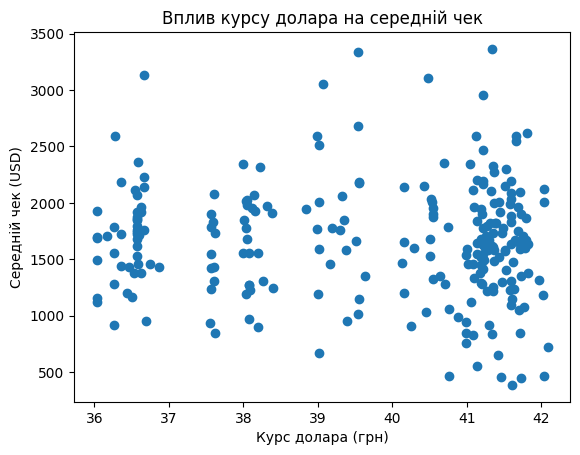

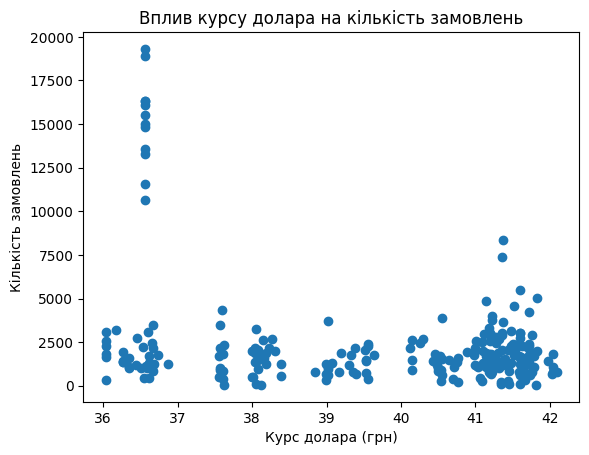

In [17]:
import matplotlib.pyplot as plt

# Середній чек від курсу
plt.scatter(agg["usd_rate"], agg["avg_check_usd"])
plt.xlabel("Курс долара (грн)")
plt.ylabel("Середній чек (USD)")
plt.title("Вплив курсу долара на середній чек")
plt.show()

# Кількість замовлень від курсу
plt.scatter(agg["usd_rate"], agg["orders_count"])
plt.xlabel("Курс долара (грн)")
plt.ylabel("Кількість замовлень")
plt.title("Вплив курсу долара на кількість замовлень")
plt.show()

Як видно з точкового графіку "Вплив курсу долара на кількість замовлень" середній чек не значно змінюється при збільшенні курсу долара, спостерігається незначне падіння менше 1000 дол. в окремих замовленнях. Основна ж кількість замовлені зберігає середній чек у діапазоні 1000-2500 дол.
Кількість замовлень теж не значно змінилась у зв'язку зі зростанням курсу: основна кількість замовлень завджи перебуває у діапазоні до 5000 од.  

З цього можна зробити наступні рекомендації:

Не панікувати через короткострокові коливання курсу: Оскільки аналіз не виявив сильного прямого впливу, компанії не варто надмірно реагувати на незначні щоденні чи щотижневі зміни курсу долара, змінюючи ціни або маркетингові стратегії.
Фокусуватися на внутрішніх факторах: Більшу увагу слід приділяти внутрішнім аспектам бізнесу, які, ймовірно, мають більший вплив на продажі: асортимент, ціноутворення (не прив'язане жорстко до курсу, якщо це можливо), якість обслуговування, ефективність маркетингових каналів, управління запасами.
Моніторинг довгострокових трендів курсу: Хоча короткострокові коливання не критичні, варто відстежувати довгострокові тренди курсу. Суттєва та стабільна девальвація гривні може з часом опосередковано вплинути на купівельну спроможність клієнтів та вартість імпортних товарів, що потребуватиме адаптації.
Аналіз впливу курсу на собівартість: Важливо розуміти, як коливання курсу впливають на собівартість товарів (особливо імпортованих) та, відповідно, на маржинальність. Якщо собівартість зростає через курс, це може "з'їдати" прибуток, навіть якщо ціни для кінцевого споживача залишаються відносно стабільними. Цей аспект потребує окремого фінансового аналізу.
Підсумовуючи: На даному етапі аналізу, курс долара не виглядає як першочерговий фактор, що спричиняє різкі "гойдалки" продажів. Більш ймовірно, причини криються в інших аспектах, таких як сезонність, проблеми з логістикою/запасами (про що згадувала логістика) або ефективність роботи з різними сегментами клієнтів та категоріями товарів (що припускав комерційний директор).

In [18]:
# Які категорії товарів мають високу маржинальність, але продаються погано?

# групуємо по категоріях
category_stats = (
    df.groupby("Категория")
    .agg(
        avg_price=("Цена", "mean"),           # середня ціна (як проксі маржинальності)
        total_orders=("ID заказа", "nunique"),# кількість замовлень
        total_qty=("Количество", "sum"),      # кількість проданих одиниць
        total_sales=("Сумма заказа", "sum")   # загальний оборот
    )
    .reset_index()
)

# критерій: висока маржинальність (avg_price > медіани), але мало продажів
median_price = category_stats["avg_price"].median()
median_orders = category_stats["total_orders"].median()

low_sales_high_margin = category_stats[
    (category_stats["avg_price"] > median_price) &
    (category_stats["total_orders"] < median_orders)
]

print(low_sales_high_margin)

  Категория     avg_price  total_orders  total_qty   total_sales
0       дом  28340.804366          2277    1384402  3.005806e+10


/tmp/ipython-input-3579043207.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Категория")


In [ ]:
# Загальна кількість всіх проданих товарів
total_qty_all = category_stats["total_qty"].sum()

# Кількість одиниць у категоріях з високою маржинальністю, але низькими продажами
total_qty_low_sales_high_margin = low_sales_high_margin["total_qty"].sum()

# Частка в загальних продажах
share_qty = total_qty_low_sales_high_margin / total_qty_all

print(f"Частка у продажах (за кількістю одиниць): {share_qty:.2%}")


Частка у продажах (за кількістю одиниць): 30.57%


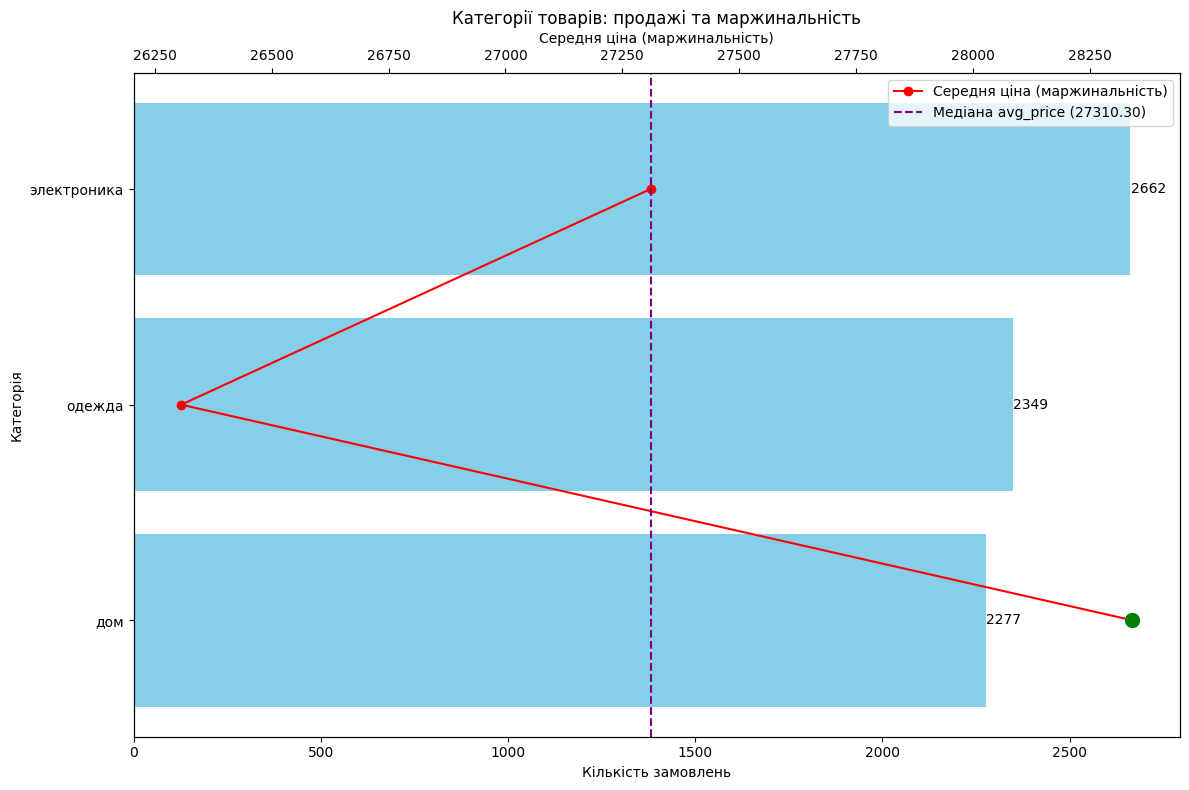

In [19]:
# Сортуємо для зручності
category_stats_sorted = category_stats.sort_values("total_orders")

fig, ax1 = plt.subplots(figsize=(12, 8))

# Стовпчики для кількості замовлень всіх категорій
bars = ax1.barh(category_stats_sorted["Категория"], category_stats_sorted["total_orders"], color="skyblue", label="Кількість замовлень")
ax1.set_xlabel("Кількість замовлень")
ax1.set_ylabel("Категорія")

# Додаємо цифри на стовпчики
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Друга вісь — середня ціна (маржинальність)
ax2 = ax1.twiny()
ax2.plot(category_stats_sorted["avg_price"], category_stats_sorted["Категория"], "ro-", label="Середня ціна (маржинальність)")
ax2.set_xlabel("Середня ціна (маржинальність)")

# Виділяємо категорії low_sales_high_margin
for idx, row in low_sales_high_margin.iterrows():
    ax2.plot(row["avg_price"], row["Категория"], "go", markersize=10)  # зелені точки для high-margin low-sales

# Додаємо лінію медіани маржинальності
median_price = category_stats["avg_price"].median()
ax2.axvline(median_price, color="purple", linestyle="--", label=f"Медіана avg_price ({median_price:.2f})")

plt.title("Категорії товарів: продажі та маржинальність")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()


На цьому графіку ми бачимо:

Стовпчики (Кількість замовлень): Показують загальну кількість замовлень для кожної категорії. Можна легко порівняти популярність категорій за обсягом продажів (кількістю транзакцій).
Червона лінія (Середня ціна / Маржинальність): Відображає середню ціну товарів у кожній категорії. Оскільки дані про маржу є в таблиці products, середня ціна слугує хорошим проксі (орієнтовним показником) маржинальності на рівні категорії. Вища середня ціна, як правило, корелює з вищою маржинальністю в абсолютному вираженні (гривнях).
Пунктирна фіолетова лінія: Це медіана середньої ціни по всіх категоріях. Вона допомагає візуально визначити, які категорії мають середню ціну вище або нижче середнього рівня.
Зелені точки: Відзначають категорії, які ми визначили як такі, що мають "високу маржинальність, але продаються погано" (тобто, середня ціна вища за медіану, а кількість замовлень нижча за медіану).
Аналіз графіка:

Ми бачимо, що категорії "одяг", "дім" та "електроніка" мають відносно схожу кількість замовлень (стовпчики). Категорія "електроніка" лідирує за кількістю замовлень, а "дім" має найменшу кількість замовлень серед цих трьох.
За середньою ціною/маржинальністю (червона лінія) категорії також розташовані відносно близько одна до одної. "Дім" має найвищу середню ціну, "електроніка" - середню, а "одяг" - найнижчу.
Зелена точка відзначає категорію "дім". Це означає, що категорія "дім" відповідає критеріям "висока маржинальність, але продається погано" на рівні агрегації за категоріями. Тобто, в середньому товари для дому мають вищу ціну (та ймовірно, вищу маржу), але загальна кількість замовлень у цій категорії є найменшою серед трьох основних категорій.
Висновки для бізнесу:

Категорія "дім" має потенціал для збільшення продажів. Хоча товари в ній дорожчі, їх купують рідше, ніж товари з інших категорій. Можливо, варто розробити стратегії для стимулювання продажів товарів для дому, наприклад, через таргетовану рекламу, пакетні пропозиції або покращення представлення товарів на сайті.


       channel       avg_LTV     median_LTV  customers
2      organic  6.756440e+06  355397.751295        139
3  paid_search  6.291912e+06  332665.087522         79
1        email  5.245227e+06  258180.622349         40
4     referral  4.980205e+06  240349.054529         95
5       social  3.686442e+06  297280.676624         75
0    affiliate  2.394625e+06  201092.904229         22


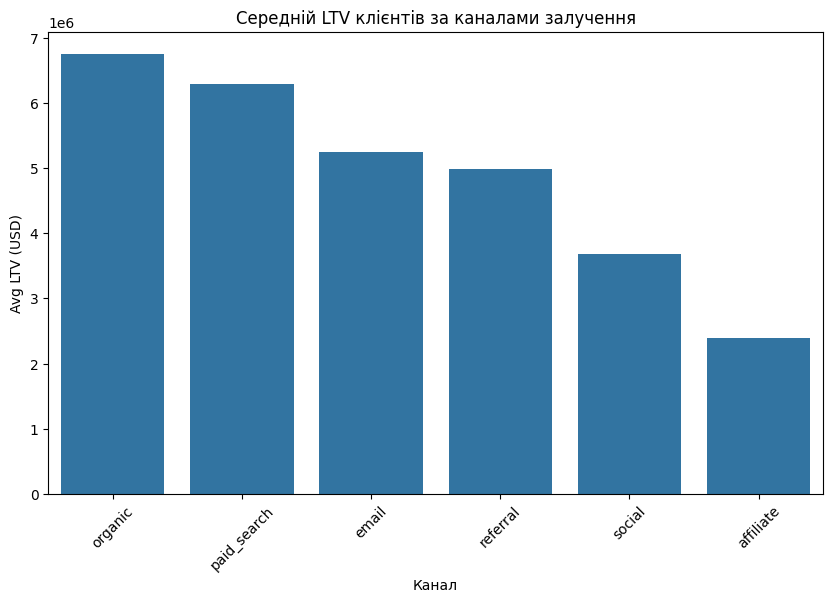

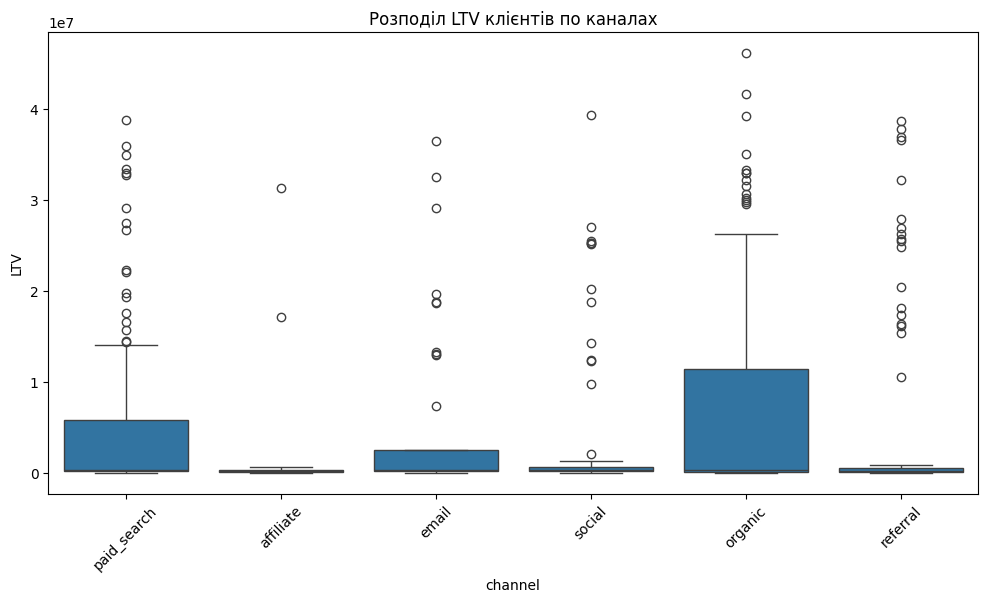

In [20]:
# Які канали залучення приносять клієнтів з високим LTV?

import seaborn as sns

# 1. Розрахунок LTV клієнтів
ltv_per_customer = (
    df.groupby("customer_id")
    .agg(
        LTV=("order_amount_usd", "sum"),
        channel=("acquisition_channel", "first")  # канал першого замовлення
    )
    .reset_index()
)

# 2. Агрегація по каналах
ltv_by_channel = (
    ltv_per_customer.groupby("channel")
    .agg(
        avg_LTV=("LTV", "mean"),
        median_LTV=("LTV", "median"),
        customers=("customer_id", "nunique")
    )
    .reset_index()
    .sort_values("avg_LTV", ascending=False)
)

print(ltv_by_channel)

# 3. Візуалізація
plt.figure(figsize=(10,6))
sns.barplot(
    data=ltv_by_channel,
    x="channel", y="avg_LTV",
    order=ltv_by_channel["channel"]
)
plt.xticks(rotation=45)
plt.title("Середній LTV клієнтів за каналами залучення")
plt.ylabel("Avg LTV (USD)")
plt.xlabel("Канал")
plt.show()

# 4. Додатково: розподіл LTV у кожному каналі
plt.figure(figsize=(12,6))
sns.boxplot(
    data=ltv_per_customer,
    x="channel", y="LTV"
)
plt.xticks(rotation=45)
plt.title("Розподіл LTV клієнтів по каналах")
plt.show()


Цей графік показує середню довічну цінність (LTV) клієнтів, згрупованих за каналом, через який вони були вперше залучені до магазину. LTV відображає загальну суму грошей, яку клієнт, за прогнозами, витратить у магазині протягом усього свого "життя" як клієнта. Високий LTV означає, що клієнти, залучені через цей канал, приносять значно більше доходу в довгостроковій перспективі.

На графіку ми бачимо середній LTV для наступних каналів:

Organic (Органічний пошук): Клієнти, які знайшли магазин через пошукові системи без платної реклами.
Paid Search (Платний пошук): Клієнти, залучені через платні рекламні оголошення в пошукових системах.
Email: Клієнти, залучені через email-маркетинг.
Referral: Клієнти, які прийшли за рекомендацією (наприклад, з інших сайтів або від друзів).
Social: Клієнти, залучені через соціальні мережі.
Affiliate: Клієнти, залучені через партнерські програми.
Аналіз графіка:

За графіком видно, що канали Organic та Paid Search мають найвищий середній LTV. Це свідчить про те, що клієнти, які приходять через пошук (як органічний, так і платний), схильні витрачати більше або робити покупки частіше протягом свого життєвого циклу як клієнти.
Канали Email та Referral також показують досить високий середній LTV, що робить їх цінними для залучення клієнтів з високим потенціалом доходу.
Канали Social та Affiliate мають нижчий середній LTV порівняно з іншими. Це не обов'язково означає, що ці канали неефективні, але вони, ймовірно, приваблюють клієнтів, які роблять менші або менш часті покупки.
Висновки для бізнесу:

Варто інвестувати більше в розвиток органічного пошуку та оптимізацію платних пошукових кампаній, оскільки вони приносять найцінніших клієнтів.
Необхідно підтримувати та розвивати email-маркетинг та реферальні програми, оскільки вони також залучають клієнтів з хорошим LTV.
При роботі з каналами Social та Affiliate можливо, варто зосередитися на збільшенні обсягів залучення або на пошуку способів підвищення LTV клієнтів з цих каналів (наприклад, через програми лояльності або просування більш дорогих товарів).


In [21]:
# Кого з клієнтів варто запросити в програму лояльності?

# RFM-агрегація
rfm = df.groupby('customer_id').agg({
    'Дата заказа': lambda x: (df['Дата заказа'].max() - x.max()).days,
    'ID заказа': 'count',
    'order_amount_usd': 'sum'
}).rename(columns={'Дата заказа': 'Recency', 'ID заказа': 'Frequency', 'order_amount_usd': 'Monetary'})

rfm = rfm.fillna(0)

# Функція для ранжування в 4 категорії
def rank_score(series, ascending=True):
    return pd.qcut(series.rank(method='first', ascending=ascending), 4, labels=[1,2,3,4]).astype(int)

# Оцінка RFM
rfm['R_Score'] = rank_score(rfm['Recency'], ascending=False)   # менше Recency = краще
rfm['F_Score'] = rank_score(rfm['Frequency'], ascending=True)
rfm['M_Score'] = rank_score(rfm['Monetary'], ascending=True)

# RFM-скора
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Відбір топ-клієнтів
top_customers = rfm[rfm['RFM_Score'].isin(['444','443','434','344'])]
top_customers = top_customers.sort_values(by=['RFM_Score','Monetary'], ascending=[False, False])

print(top_customers.head(20))



             Recency  Frequency      Monetary  R_Score  F_Score  M_Score  \
customer_id                                                                
78               0.0      18000  3.002058e+07        4        4        4   
112              0.0      14976  2.460613e+07        4        4        4   
159              0.0       7345  1.066918e+07        4        4        4   
160              0.0       4753  7.339463e+06        4        4        4   
23               0.0      28122  4.621038e+07        3        4        4   
150             36.0      24347  4.165951e+07        3        4        4   
16              37.0      26624  3.922293e+07        3        4        4   
103             40.0      24288  3.886560e+07        3        4        4   
53               1.0      20648  3.872729e+07        3        4        4   
93              62.0      18031  3.782373e+07        3        4        4   
36               2.0      24288  3.690882e+07        3        4        4   
34          

Проведено RFM-аналіз клієнтів, що дозволив оцінити їх за трьома параметрами:

Recency (давність останнього замовлення) – наскільки недавно клієнт купував;

Frequency (частота покупок) – скільки разів клієнт здійснював замовлення;

Monetary (сума покупок) – скільки клієнт витратив у сумі.

За допомогою RFM-скору ми виділили топових клієнтів (RFM_Score ≥ 444), які:

Купували нещодавно,

Робили покупки часто,

Витрачали значні суми.

Ці клієнти є найбільш цінними для бізнесу і мають високий потенціал для участі у програмі лояльності, оскільки ймовірність повторних покупок у них найвища.

Наступним кроком можна розробити персоналізовані пропозиції, бонуси або спеціальні акції для цього сегмента, щоб підвищити утримання та середній чек.

In [22]:
# Чи є сезонність продажів за останні 2 роки?

# кількість замовлень
monthly_orders = df.groupby("Дата заказа")["ID заказа"].count()

# сума замовлень
monthly_revenue = df.groupby("Дата заказа")["Сумма заказа"].sum()

# середній чек
avg_check = monthly_revenue / monthly_orders

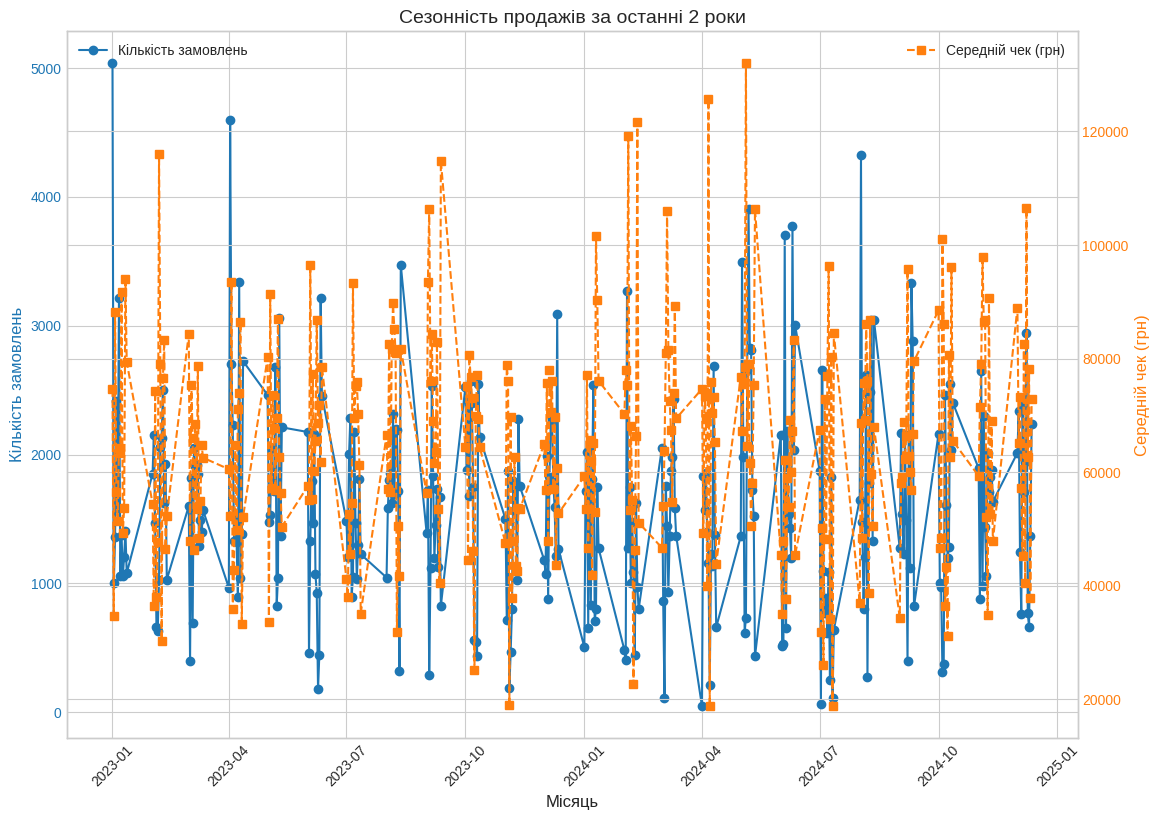

In [23]:
plt.style.use("seaborn-v0_8-whitegrid")

# 🔹 Фільтруємо дані до 2025 року
monthly_orders_filtered = monthly_orders[monthly_orders.index < '2025-01']
avg_check_filtered = avg_check[avg_check.index < '2025-01']

# 🔹 Побудова графіка
fig, ax1 = plt.subplots(figsize=(11.7, 8.3))  # A4 формат у дюймах (ландшафтна орієнтація)

# 1️⃣ Кількість замовлень
ax1.plot(
    monthly_orders_filtered.index,
    monthly_orders_filtered,
    color="tab:blue",
    marker="o",
    label="Кількість замовлень"
)
ax1.set_xlabel("Місяць", fontsize=12)
ax1.set_ylabel("Кількість замовлень", color="tab:blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.tick_params(axis="x", rotation=45)

# 2️⃣ Середній чек
ax2 = ax1.twinx()
ax2.plot(
    avg_check_filtered.index,
    avg_check_filtered,
    color="tab:orange",
    marker="s",
    linestyle="--",
    label="Середній чек (грн)"
)
ax2.set_ylabel("Середній чек (грн)", color="tab:orange", fontsize=12)
ax2.tick_params(axis="y", labelcolor="tab:orange")

# 3️⃣ Заголовок і легенди
plt.title("Сезонність продажів за останні 2 роки", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


/tmp/ipython-input-2618273413.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby(['month', 'Категория'])['ID заказа']


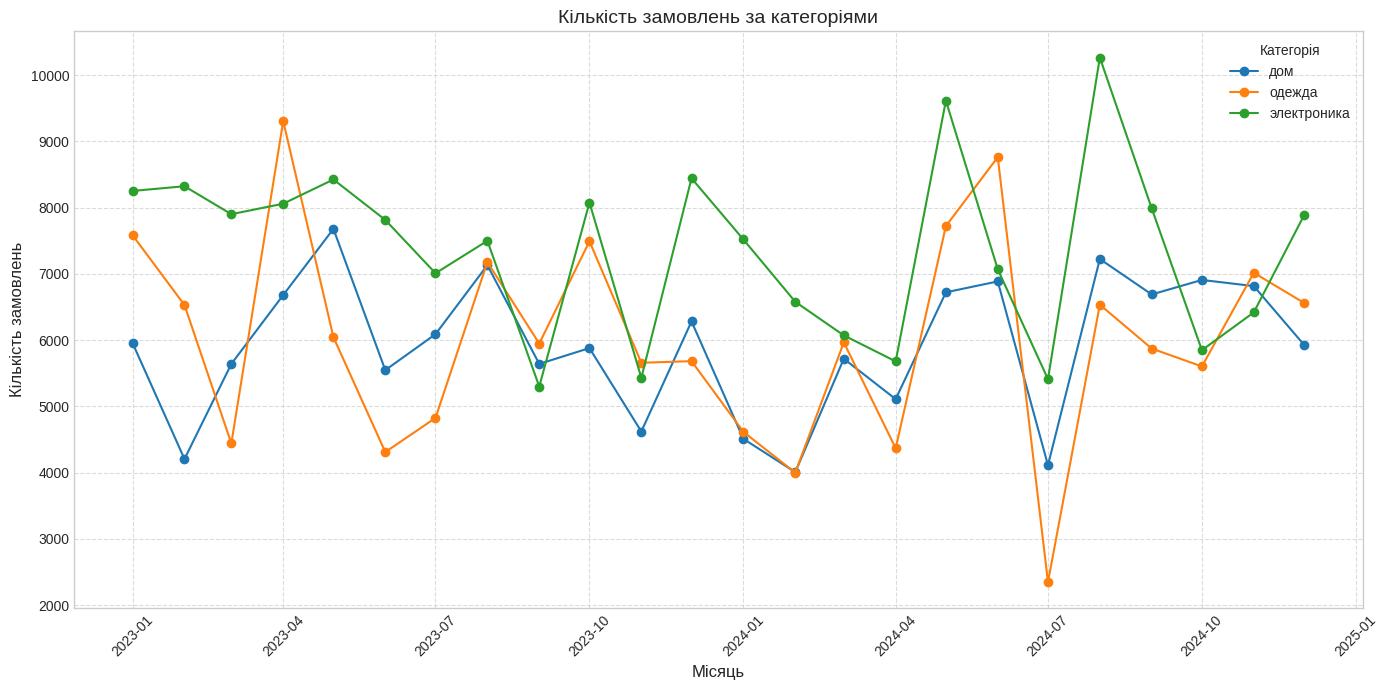

In [25]:
df_filtered = df[df['month'] < '2025-01']
monthly_category = (
    df_filtered.groupby(['month', 'Категория'])['ID заказа']
    .count()
    .unstack()
)

# Якщо індекс є періодом — перетворюємо його на дату
if isinstance(monthly_category.index, pd.PeriodIndex):
    monthly_category.index = monthly_category.index.to_timestamp()

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(14, 7))

# Малюємо лінії для кожної категорії без згладження
for category in monthly_category.columns:
    plt.plot(
        monthly_category.index,
        monthly_category[category],
        marker="o",
        label=category
    )

plt.title("Кількість замовлень за категоріями", fontsize=14)
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Кількість замовлень", fontsize=12)
plt.legend(title="Категорія")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


На графіку "Кількість замовлень за категоріями" ми бачимо, як змінюється кількість замовлень для кожної з трьох категорій ("дім", "одяг", "електроніка") протягом місяців.

Категорія "дім" (синя лінія): Має досить: стабільну кількість замовлень з невеликими коливаннями. Спостерігаються невеликі піки навесні та наприкінці літа/початку осені.
Категорія "одяг" (помаранчева лінія): Показує більш виражену сезонність. Є помітні піки навесні (квітень-травень) та восени (вересень-жовтень), що, ймовірно, пов'язано зі зміною сезонів та оновленням гардеробу. Літні місяці (липень-серпень) є періодом спаду.
Категорія "електроніка" (зелена лінія): Також має свою сезонність. Піки можуть припадати на періоди перед святами (наприклад, грудень) або під час виходу нових гаджетів. Спостерігається певний спад влітку.

/tmp/ipython-input-3724224679.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby(['month', 'Категория'])['Сумма заказа']


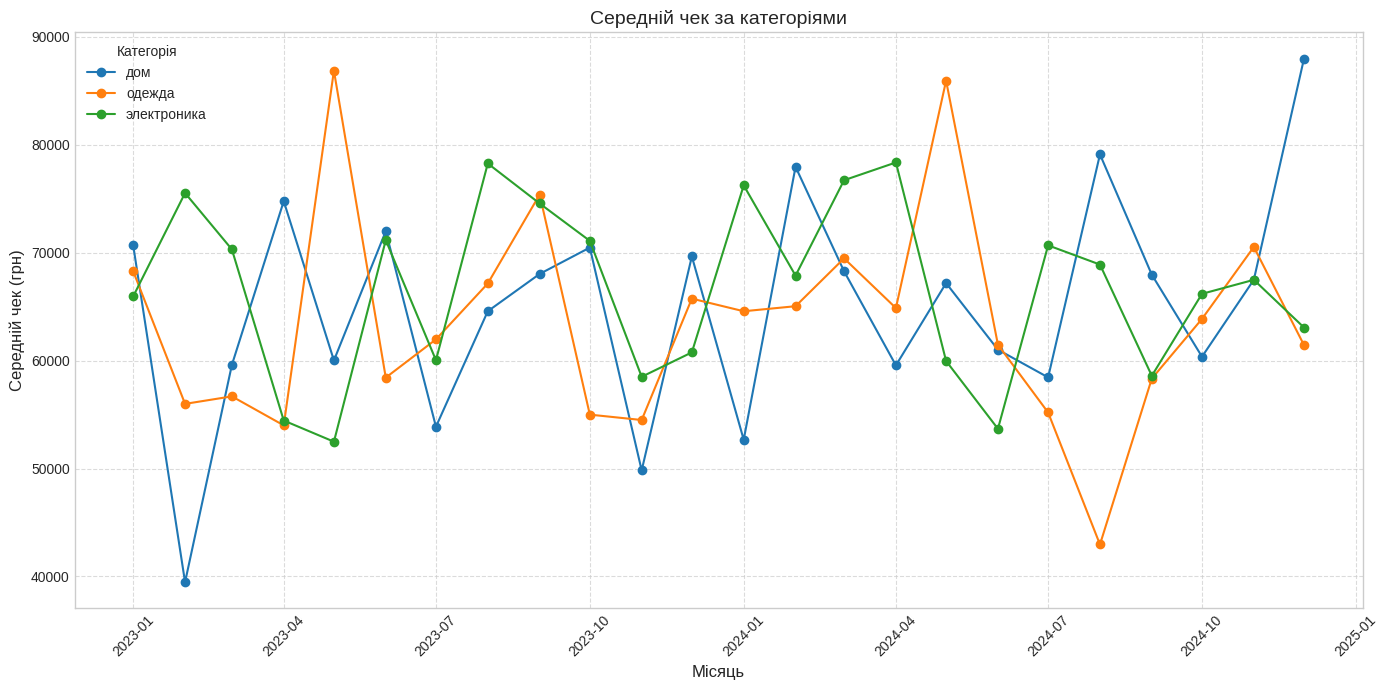

In [26]:
# Групуємо по місяцях і категоріях та рахуємо середній чек
monthly_avg_check = (
    df_filtered.groupby(['month', 'Категория'])['Сумма заказа']
    .mean()
    .unstack()
)

# Якщо індекс — PeriodIndex, перетворюємо на timestamp
if isinstance(monthly_avg_check.index, pd.PeriodIndex):
    monthly_avg_check.index = monthly_avg_check.index.to_timestamp()

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(14, 7))

# Лінії для кожної категорії без згладження
for category in monthly_avg_check.columns:
    plt.plot(
        monthly_avg_check.index,
        monthly_avg_check[category],
        marker="o",
        label=category
    )

plt.title("Середній чек за категоріями", fontsize=14)
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Середній чек (грн)", fontsize=12)
plt.legend(title="Категорія")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Категорія "Дім" (синя лінія): Середній чек у цій категорії має тенденцію до зростання протягом року, з помітними піками в літні місяці (приблизно травень-червень та серпень). Це може вказувати на те, що в ці періоди клієнти частіше купують дорожчі товари для дому, можливо, пов'язані з ремонтом, будівництвом, облаштуванням дачі чи літнього відпочинку.
Категорія "Одяг" (помаранчева лінія): Середній чек на одяг більш коливається протягом року. Можна побачити деякі піки, які можуть співпадати з виходом нових колекцій (весняної, осінньої) або розпродажами. Наприклад, може бути зростання середнього чеку, коли купують верхній одяг або взуття на початку сезону.
Категорія "Електроніка" (зелена лінія): Середній чек на електроніку також демонструє коливання. Тут піки можуть бути пов'язані з періодами свят (наприклад, перед Новим роком) або з акціями на дорогі електронні пристрої. Також можливе зростання середнього чеку, якщо в певний період популярні великі покупки (телевізори, ноутбуки тощо).
Важливі моменти з цього графіку:

На відміну від графіка кількості замовлень, де загальний літній спад був очевидним, графік середнього чеку показує, що в літні місяці (травень-червень, серпень) середній чек може бути досить високим, особливо для категорії "Дім". Це говорить про те, що хоча кількість транзакцій може падати, вартість однієї покупки зростає.


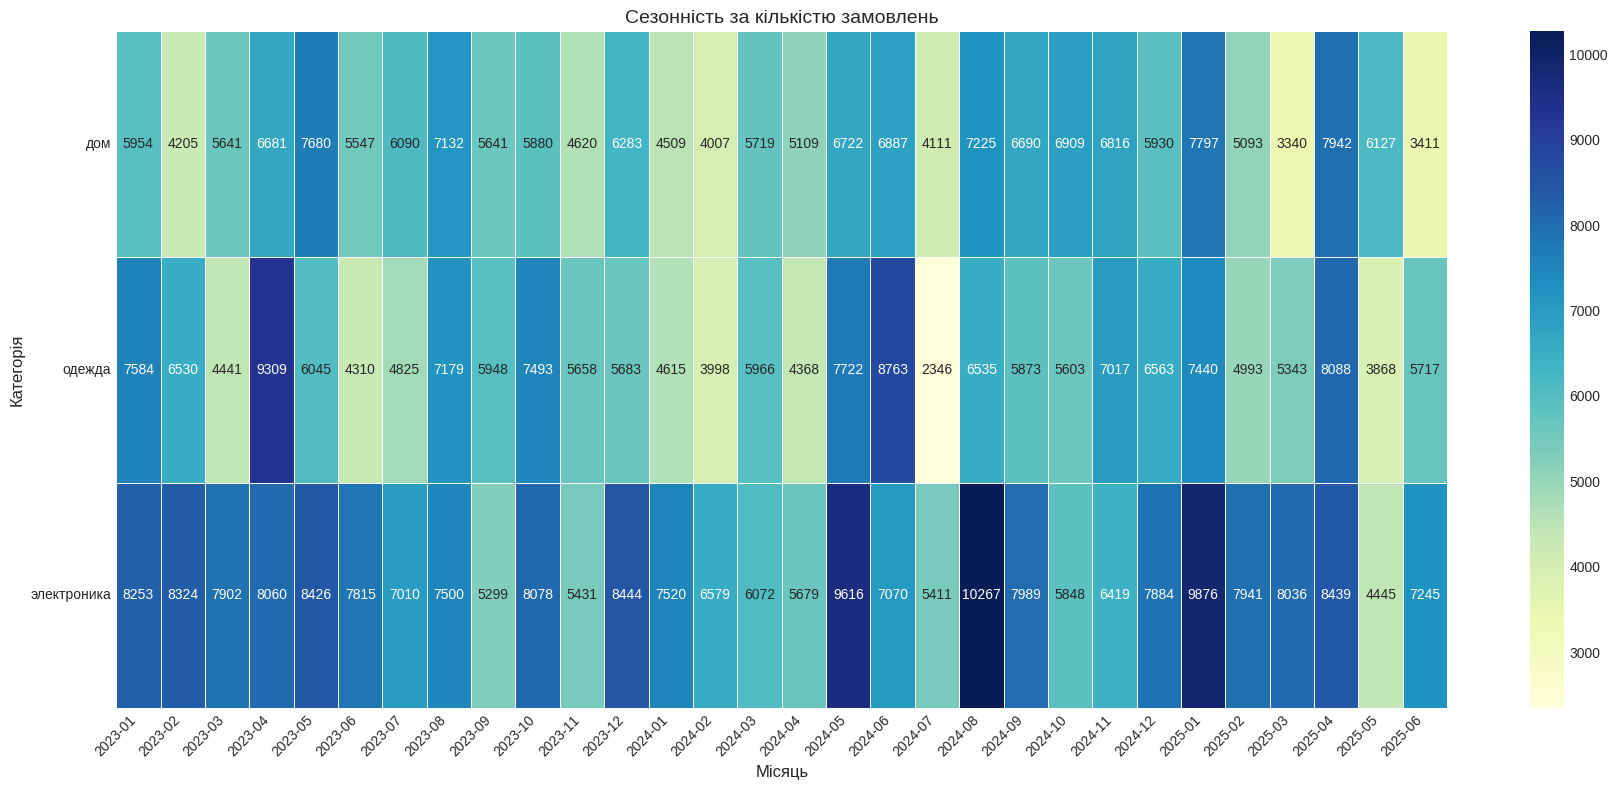

In [27]:
# === 1️⃣ Теплокарта за кількістю замовлень ===
orders_pivot = (
    df.groupby(["Категория", "month"], observed=False)["ID заказа"]
    .count()
    .reset_index()
    .pivot(index="Категория", columns="month", values="ID заказа")
)

plt.figure(figsize=(18, 8))
sns.heatmap(
    orders_pivot,
    cmap="YlGnBu",
    annot=True,
    fmt=".0f",
    annot_kws={"size": 10},  # 🔹 зменшити або збільшити шрифт чисел
    linewidths=0.5,          # 🔹 тонкі лінії між комірками
)
plt.title("Сезонність за кількістю замовлень", fontsize=14)
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Категорія", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

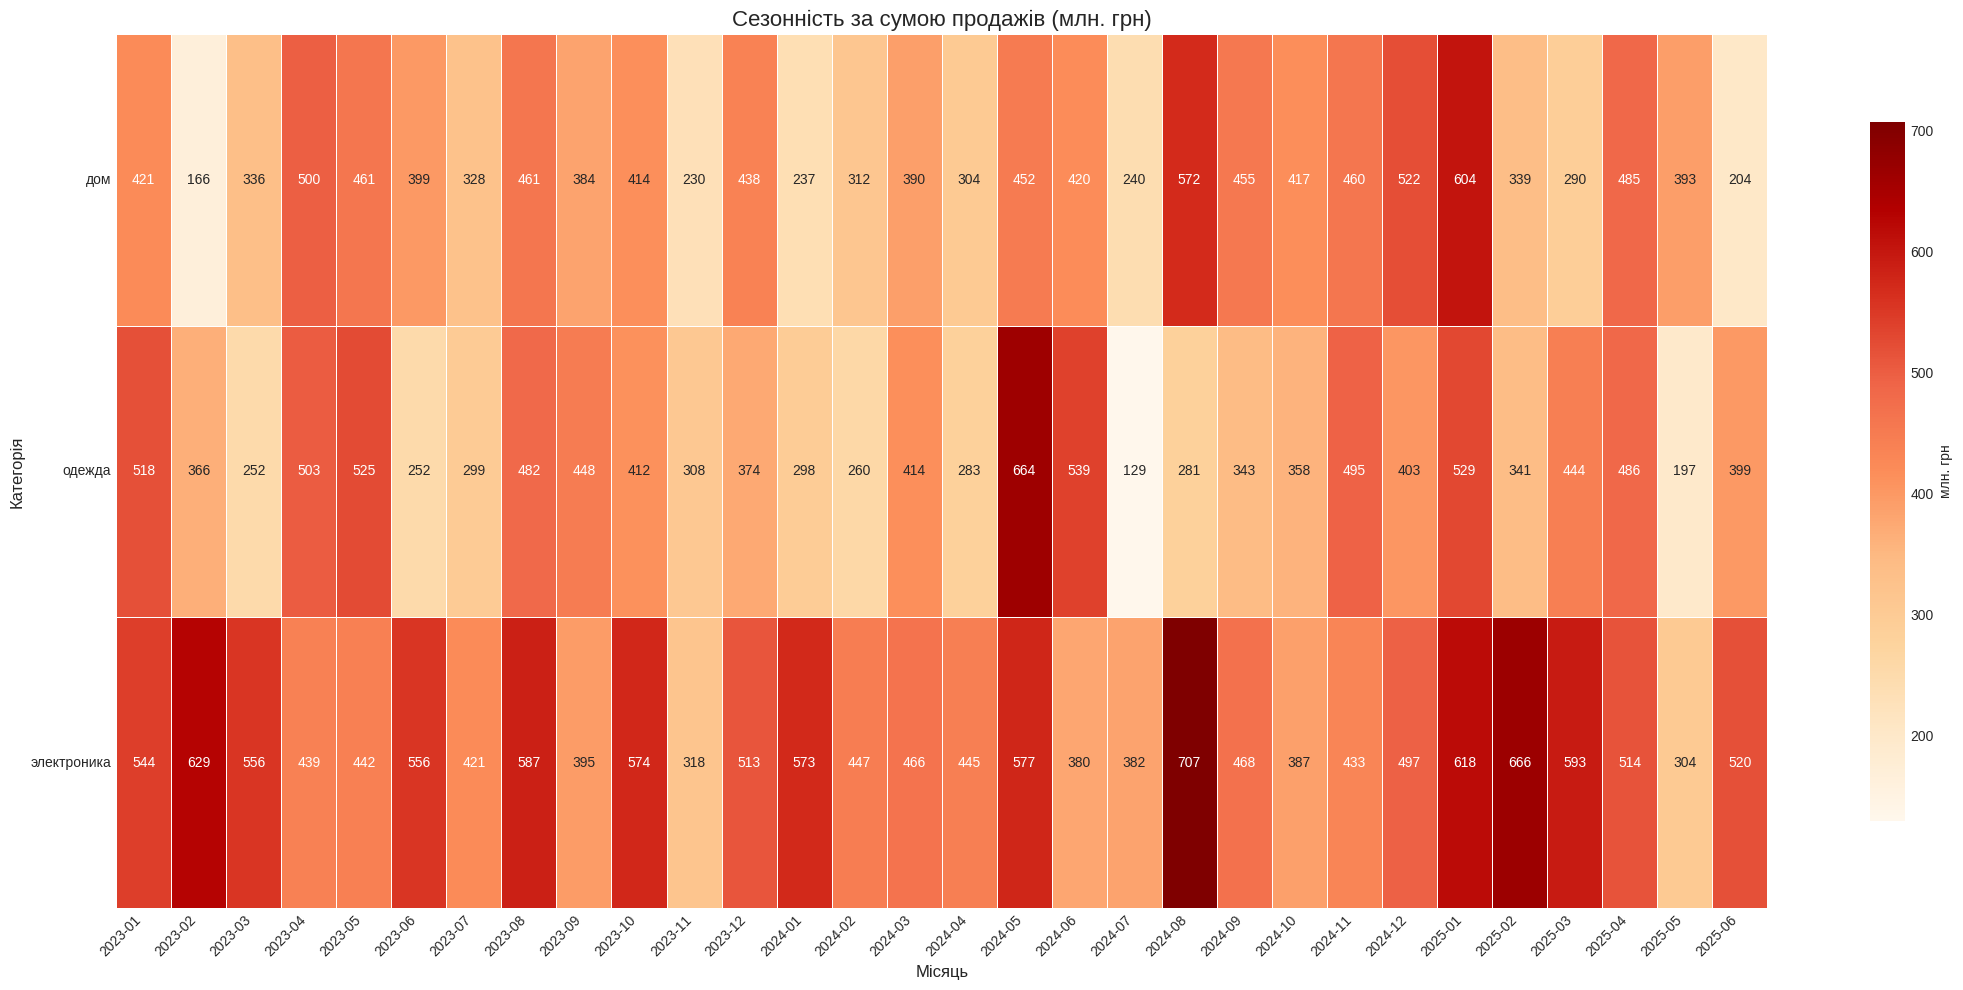

In [ ]:
# === 2️⃣ Теплокарта за сумою продажів (млн грн) ===
revenue_pivot = (
    df.groupby(["Категория", "month"], observed=False)["Сумма заказа"]
    .sum()
    .reset_index()
)

# Перетворюємо суми в тисячі гривень
revenue_pivot["Сумма заказа"] = revenue_pivot["Сумма заказа"] / 1000000

# Створюємо теплокарту
revenue_pivot = revenue_pivot.pivot(index="Категория", columns="month", values="Сумма заказа")

plt.figure(figsize=(22, 10))
sns.heatmap(
    revenue_pivot,
    cmap="OrRd",
    annot=True,
    fmt=".0f",
    annot_kws={"size": 10},
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "млн. грн"}  # 🔹 додаємо легенду у тис. грн
)
plt.title("Сезонність за сумою продажів (млн. грн)", fontsize=16)
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Категорія", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Основні висновки з аналізу сезонності продажів, які ми побачили на графіках та теплокартах, наступні:

Виражена сезонність: Продажі Shop&Joy мають чіткі сезонні патерни як у загальному обсязі, так і в розрізі категорій.
Весняний пік кількості замовлень: Найбільша кількість замовлень спостерігається навесні (березень-квітень).
Літній спад: Липень є найслабшим періодом як за кількістю замовлень, так і за середнім чеком.
Високий середній чек влітку (травень-червень, серпень): Незважаючи на меншу кількість замовлень, в ці місяці клієнти купують дорожчі товари.
Ключовий зимовий період: Листопад-грудень є критично важливим завдяки високому середньому чеку (листопад) та високій кількості замовлень (грудень).


/tmp/ipython-input-369283251.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Категория', as_index=False)
/tmp/ipython-input-369283251.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  low_turnover = df.groupby('Название товара', as_index=False).agg({
/tmp/ipython-input-369283251.py:44: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  plt.tight_layout()


📦 Загальний залишок по категоріях:
     Категория   Остаток  Количество        Маржа  Сумма заказа
2  электроника  58287427     1726340  8003.269616  3.878981e+10
0          дом  47831706     1384402  7359.637521  3.005806e+10
1       одежда  46213121     1417481  7272.105539  2.990766e+10

⚠️ Товари з великими залишками, але низькими продажами:
             Название товара  Остаток   total_sales    Маржа    Категория
406     Sony Телевизор 9965E   830000  1.085811e+08  3365.71  электроника
368    Reebok Толстовка 879D   826200  1.966099e+08  6795.07       одежда
68       Bosch Подушка 3186E   794751  6.704535e+07  1291.57          дом
115    Columbia Платье 4694E   784336  1.527291e+08  1306.72       одежда
125       H&M Кроссовки 396E   740927  2.383145e+08  8064.40       одежда
395        Sony Камера 5937E   725570  2.319585e+08  9094.11  электроника
388  Samsung Телевизор 8624A   706307  1.124025e+07   163.97  электроника
131          H&M Платье 979A   703296  2.431069e+08  4224.69

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


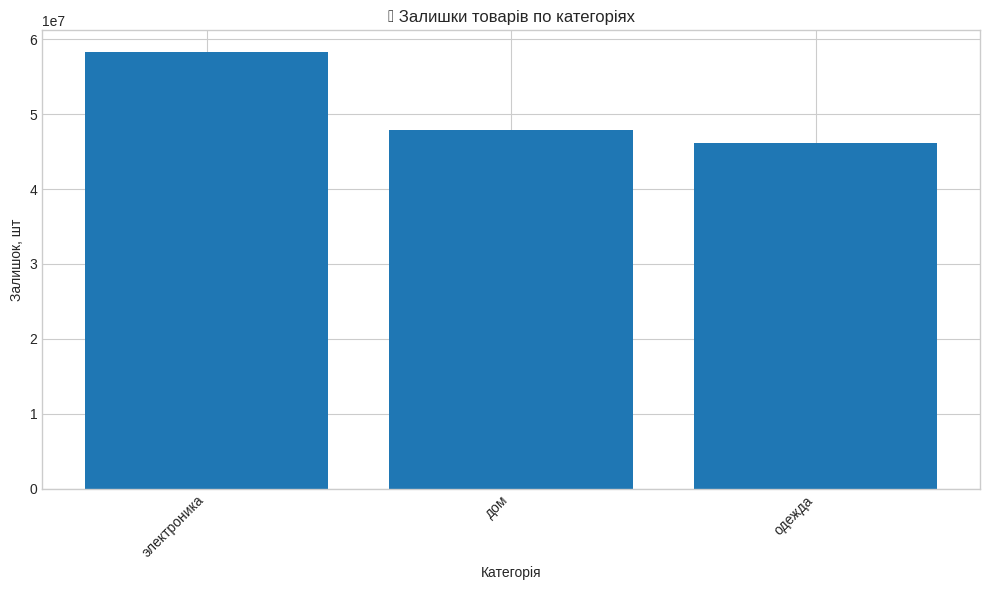

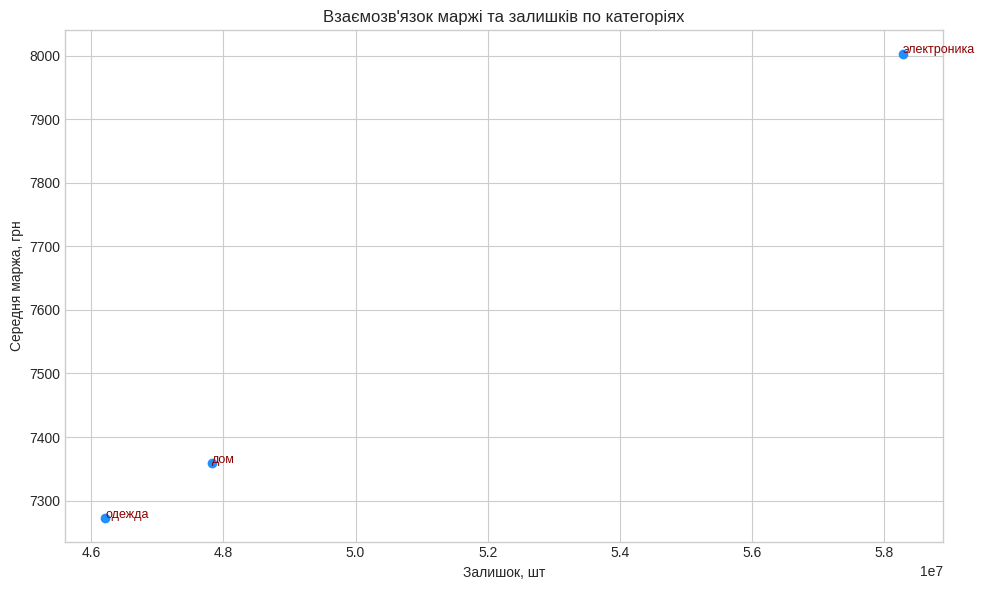

In [30]:
# Загальна статистика по залишках
stock_summary = (
    df.groupby('Категория', as_index=False)
    .agg({
        'Остаток': 'sum',
        'Количество': 'sum',
        'Маржа': 'mean',
        'Сумма заказа': 'sum'
    })
    .sort_values(by='Остаток', ascending=False)
)

print(" Загальний залишок по категоріях:")
print(stock_summary)

# Виявлення товарів з ризиком (високі залишки, але низькі продажі)
df['total_sales'] = df['Количество'] * df['Цена']
low_turnover = df.groupby('Название товара', as_index=False).agg({
    'Остаток': 'sum',
    'total_sales': 'sum',
    'Маржа': 'mean',
    'Категория': 'first'
})

# Фільтр: залишок > середнього, продажі < середнього
avg_stock = low_turnover['Остаток'].mean()
avg_sales = low_turnover['total_sales'].mean()

slow_items = low_turnover[
    (low_turnover['Остаток'] > avg_stock) &
    (low_turnover['total_sales'] < avg_sales)
].sort_values(by='Остаток', ascending=False)

print("\n Товари з великими залишками, але низькими продажами:")
print(slow_items.head(10))

#  Візуалізація запасів по категоріях
plt.figure(figsize=(10, 6))
plt.bar(stock_summary['Категория'], stock_summary['Остаток'])
plt.xticks(rotation=45, ha='right')
plt.title(" Залишки товарів по категоріях")
plt.xlabel("Категорія")
plt.ylabel("Залишок, шт")
plt.tight_layout()
plt.show()

#  Маржинальність + залишки
plt.figure(figsize=(10, 6))
plt.scatter(stock_summary['Остаток'], stock_summary['Маржа'], color='dodgerblue')

# Додаємо підписи категорій біля точок
for i, row in stock_summary.iterrows():
    plt.text(row['Остаток'] + 0.2, row['Маржа'] + 0.2,
             str(row['Категория']), fontsize=9, color='darkred')

plt.title("Взаємозв'язок маржі та залишків по категоріях")
plt.xlabel("Залишок, шт")
plt.ylabel("Середня маржа, грн")
plt.grid(True)
plt.tight_layout()
plt.show()
